# Non-parametric Statistics 
## Chapter 3.2: Local Polynomials
### Use of Different Kernels

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [6]:
# this code should work for anyone who cloned the project via github
# as it ensures that you have the correct project structure
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, "..", ".."))
plots_folder = os.path.join(project_root, "plots/chap3/local_polynomial")

# Please check this is correct path, hopefully it works fine
plots_folder

'/Users/adam/Desktop/Edinburgh/y4/MP/nonparam-stats-proj/plots/chap3/local_polynomial'

In [7]:
# Define some kernels
def gaussian_kernel(x, sigma=1):
    return (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(- (x ** 2) / (2 * sigma ** 2))

def uniform_kernel(x):
    return np.where(np.abs(x) <= 1, 0.5, 0)

def epanechnikov_kernel(x):
    return np.where(np.abs(x) <= 1, 0.75 * (1 - x**2), 0)

def biweight_kernel(x):
    return np.where(np.abs(x) <= 1, 15/16 * (1 - x**2)**2, 0)

def cosine_kernel(x):
    return np.where(np.abs(x) <= 1, (np.pi / 4) * np.cos(np.pi * x / 2), 0)

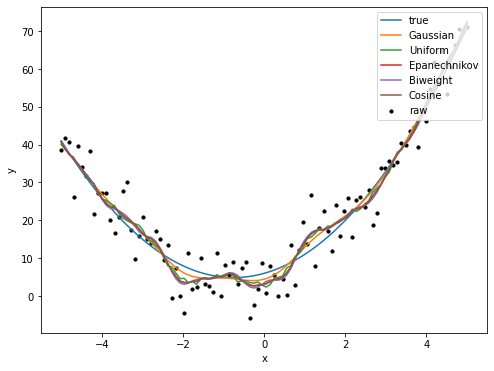

In [19]:
def local_lin(Y, kernel_func, h, x_grid):
    rx = np.zeros_like(x_grid)
    for i in range(len(Y)):
        Sn2 = sum(kernel_func((x_grid[i] - x_grid)/h) * (x_grid[i] - x_grid)**2)
        Sn1 = sum(kernel_func((x_grid[i] - x_grid)/h) * (x_grid[i] - x_grid))
        bx = kernel_func((x_grid[i] - x_grid)/h) * (Sn2 - (x_grid[i] - x_grid) * Sn1)
        lx = bx / sum(bx)
        rx[i] = np.dot(lx, Y)
    return rx

x = np.linspace(-5, 5, 100)
data = 3*x + 2*x**2 + np.random.normal(0, 5, size = 100) + 6
true = 3*x + 2*x**2 + 6
h = .5

plt.figure(figsize=(8, 6))

plt.plot(x, true, label="true")
plt.scatter(x, data, label="raw", c="black", s=10)
plt.plot(x, local_lin(data, gaussian_kernel, h, x), label="Gaussian")
plt.plot(x, local_lin(data, uniform_kernel, h, x), label="Uniform")
plt.plot(x, local_lin(data, epanechnikov_kernel, h, x), label="Epanechnikov")
plt.plot(x, local_lin(data, biweight_kernel, h, x), label="Biweight")
plt.plot(x, local_lin(data, cosine_kernel, h, x), label="Cosine")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper right")

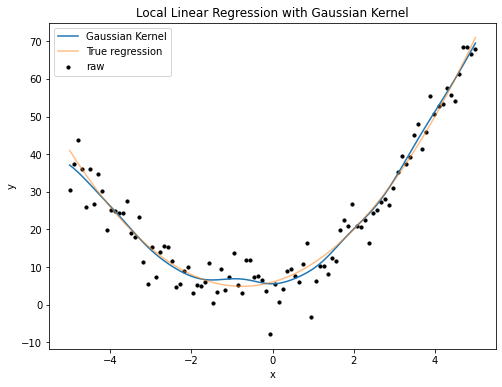

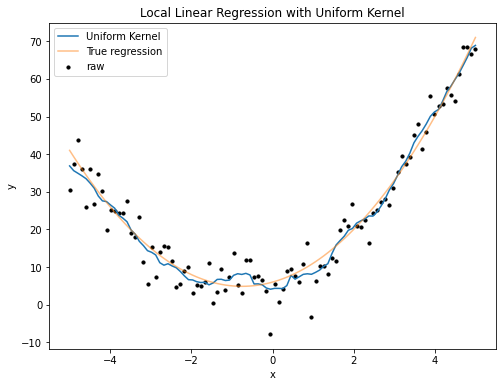

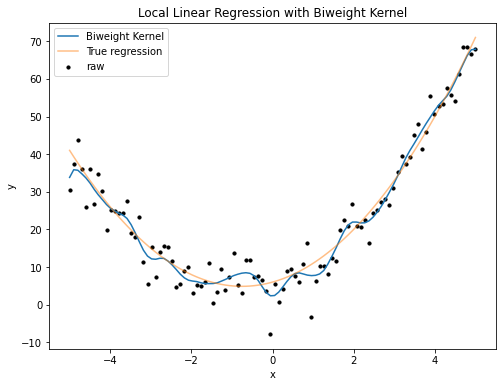

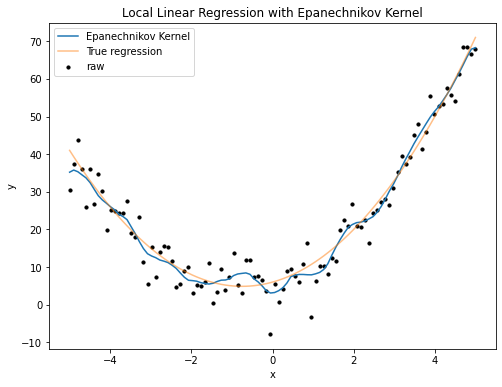

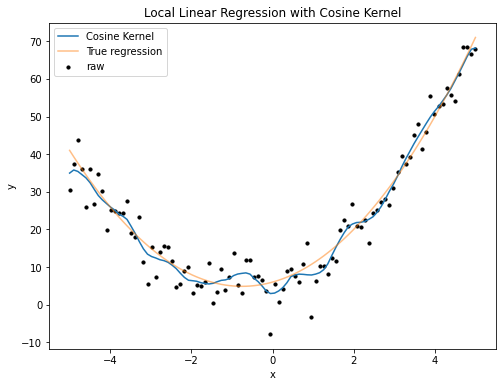

In [15]:
kernels = [gaussian_kernel, uniform_kernel, biweight_kernel, epanechnikov_kernel, cosine_kernel]
kernel_names = ["Gaussian", "Uniform", "Biweight", "Epanechnikov", "Cosine"]


for kernel, name in zip(kernels, kernel_names):
    plt.figure(figsize=(8, 6))
    plt.scatter(x, data, label="raw", c="black", s=10)
    plt.plot(x, local_lin(data, kernel, h, x), label=f'{name} Kernel')

    plt.plot(x, true, alpha=.5,label='True regression')

    plt.title(f'Local Linear Regression with {name} Kernel')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.savefig(os.path.join(plots_folder, f"example-{name}-kr.png"))

    
    plt.show()

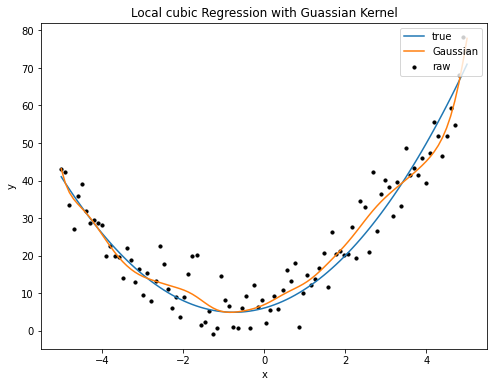

In [81]:
def local_pol(Y, kernel_func, h, x_grid, deg):
    n = len(Y)
    rx = []
    e1 = np.zeros((n, 1))
    e1[0] = 1
    for x in x_grid:
        X = np.zeros((n, deg+1))
        W = np.zeros((n, n))
        for i in range(n):
            X[:, 0] = 1
            W[i, i] = kernel_func((x - x_grid[i]) / h) / sum(kernel_func((x_grid - x_grid[i]) / h))
            for j in range(1, deg+1):
                X[i, j] = (x_grid[i] - x)**j
        XTW = np.dot((X.T), W)
        XTWX = np.dot(XTW, X)
        XWX_inv = np.linalg.inv(XTWX)
        XW = np.dot(X.T, W)
        wi = np.dot(XWX_inv, XW)[0,:]
        rx.append(np.dot(wi, Y))
    return rx

x = np.linspace(-5, 5, 100)
data = 3*x + 2*x**2 + np.random.normal(0, 5, size = 100) + 6
true = 3*x + 2*x**2 + 6
h = .5

plt.figure(figsize=(8, 6))

plt.plot(x, true, label="true")
plt.scatter(x, data, label="raw", c="black", s=10)
plt.plot(x, local_pol(data, gaussian_kernel, h, x, 3), label="Gaussian")
plt.title(f'Local cubic Regression with Guassian Kernel')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper right")

plt.savefig(os.path.join(plots_folder, "Local Cubic Polynomial Regression.png"))

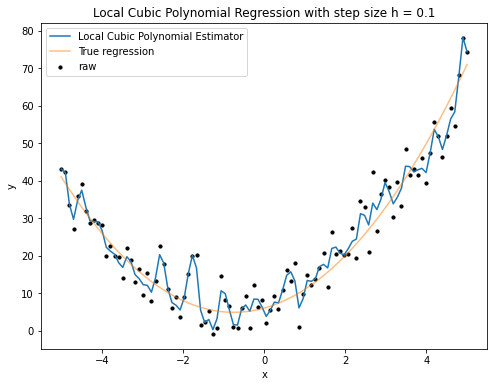

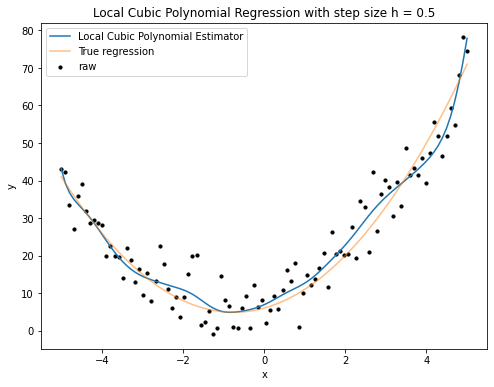

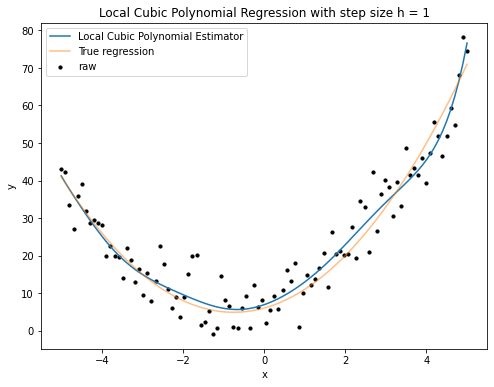

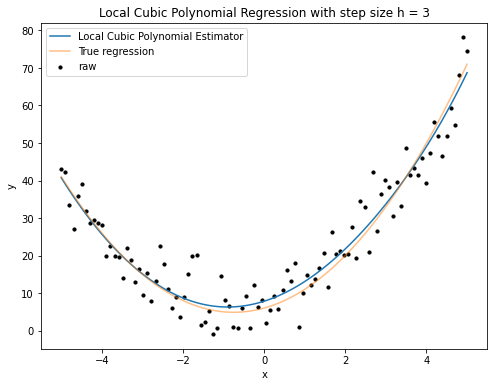

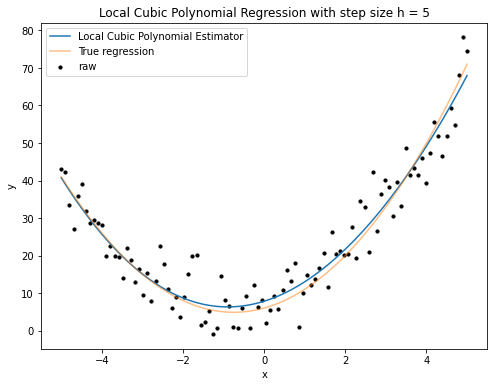

In [82]:
hs = [0.1, 0.5, 1, 3, 5]
step_size = ["h = 0.1", "h = 0.5", "h = 1", "h = 3", "h = 5"]


for h, name in zip(hs, step_size):
    plt.figure(figsize=(8, 6))
    plt.scatter(x, data, label="raw", c="black", s=10)
    plt.plot(x, local_pol(data, gaussian_kernel, h, x, 3), label=f'Local Cubic Polynomial Estimator')

    plt.plot(x, true, alpha=.5,label='True regression')

    plt.title(f'Local Cubic Polynomial Regression with step size {name}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.savefig(os.path.join(plots_folder, f"Local Cubic Polynomial-{name}.png"))

    
    plt.show()

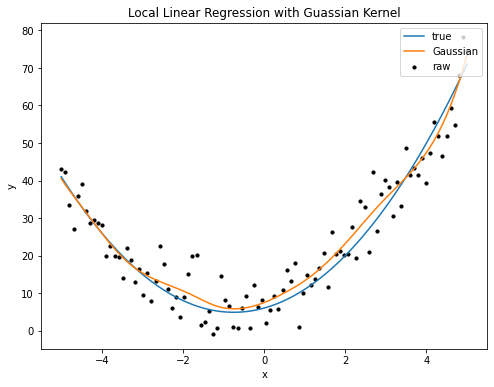

In [88]:
h = .5

plt.figure(figsize=(8, 6))

plt.plot(x, true, label="true")
plt.scatter(x, data, label="raw", c="black", s=10)
plt.plot(x, local_lin(data, gaussian_kernel, h, x), label="Gaussian")
plt.title(f'Local Linear Regression with Guassian Kernel')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper right")

plt.savefig(os.path.join(plots_folder, "Local Linear Polynomial Regression.png"))

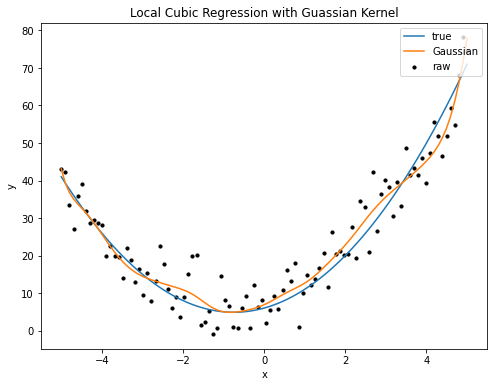

In [85]:
plt.figure(figsize=(8, 6))

plt.plot(x, true, label="true")
plt.scatter(x, data, label="raw", c="black", s=10)
plt.plot(x, local_pol(data, gaussian_kernel, h, x, 3), label="Gaussian")
plt.title(f'Local Cubic Regression with Guassian Kernel')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper right")